# Recommendation Systems

# Types

1. Content based recommendation systems:


Content based recommendation systems focus on properties of items.These recommendation systems use features between the given items and find similarities between them as a measure for giving recommendations.For example, if a user likes the first installment of The Harry Potter movies, the recommendation system will probably recommended all the other installments. Another example can be the recommendation of a 20 min workout video on youtube because you have watched a 10 min workout video posted by the same creator.User reviews are not required in this type.
2. Collaborative filtering recommendation systems:


On the other hand, systems focus on the relationship between users and items. These models require user reviews as they play a key role in scoring.Collaborative filtering models can recommend an item to user A based on the interests of a similar user B. User's previous history is also taken into consideration. For example, recommendation of a crime tv series to user A because user B who has watched similar shows as of User A has reviewed the crime series. 

# Content based recommendation systems

Item profiles:

In content based recommendation systems, each item has a profile. In most cases, profiles contain characteristics of the item that are easily available or discovered.
For example, these features can be used in profiles of movies/tv shows on netflix.
* Title
* Actors in the movie/tv show
* Director
* Genre
* Plot/Storyline

****Representing Item Profiles****

The ultimate goal in content based recommendation systems, is creating an item profile. Here, the TF-IDF Concept comes into picture.

TF-IDF:
TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. It was originally developed for document search and information retrieval.But, over the years, it is used in recommendation systems and machine learning models too.

How does TF-IDF work?
It calculates term frequency of a word in a document.

# Collaborative Filtering 

This is a significantly different approach to recommendation.
Instead of using features of items to determine their similarity, we focus on the
similarity of the user ratings for two items. That is, in place of the item-profile
vector for an item, we use its column in the utility matrix.

## Measuring Similarity

The first question we must deal with is how to measure similarity of users or
items from their rows or columns in the utility matrix. Utility matrix is the matrix where rows represent user ratings or any such feature and columns represent movie/items.

Consider the following utility matrix:
![image.png](attachment:image.png)

Here A,B,C,D are the users and the column headers are the movies.The values in the matrix denote ratings.

Cosine similarity is finding the cosine distance between two users. It is similar to dot product of two vectors. Blanks are treated as 0.
![COS](https://i.stack.imgur.com/36r1U.png)

Let us calculate similarity between User A and User B:

cos angle between A and B= ((4*3)+(5*4))/sqrt(4^2+5^2+2^2)*sqrt(3^2+5^2+4^2+1^2)

This is how cosine similarity is calculated. After calculating the cosine similarites, an algorithm like Kmeans or Decision tree can be applied to the data to get the nearest neighbors as recommendations.

For a hands-on implementation on collaborative filtering, [CLICK HERE](https://www.kaggle.com/niharika41298/netflix-or-books-recommender-analysis-eda#2.-Collaborative-Filtering)

# Hybrid recommendation systems.

A hybrid recommender is a special kind of recommender that uses both collaborative and content based filtering for making recommendations.

## Fact:
75% of what people are watching on Netflix comes from recommendations, according to McKinsey and Recommendations are responsible for 70% of the time people spend watching videos on YouTube.


In [ ]:
# Use `hole` to create a donut-like pie chart
values=[75, 25]
labels=['Recommended Content',"Originals"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=15,
                  marker=dict(colors=['#DAA520','#800000'], line=dict(color='#FFFFFF', width=2.5)))
fig.update_layout(
    title='Recommended Views VS Original')
austosize=False
py.iplot(fig)

# LightFM Hybrid recommender

LightFM is a Python implementation of a number of popular recommendation algorithms for both implicit and explicit feedback.

It also makes it possible to incorporate both item and user metadata into the traditional matrix factorization algorithms.

The below implementation is using the pre-existing dataset of movielens provided by LIGHTFM libraries.

In [1]:
pip install lightfm

     |████████████████████████████████| 307kB 5.2MB/s 
  Created wheel for lightfm: filename=lightfm-1.15-cp36-cp36m-linux_x86_64.whl size=709156 sha256=e00c34e016da83f8e43cd688c5752530148b451e3aa7887f136d555c12905917
  Stored in directory: /root/.cache/pip/wheels/eb/bb/ac/188385a5da6627956be5d9663928483b36da576149ab5b8f79
Successfully built lightfm


In [2]:
import numpy as np
from lightfm.data import Dataset
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
from lightfm.datasets import fetch_movielens
from lightfm.cross_validation import random_train_test_split
from scipy.sparse import coo_matrix as sp

In [3]:
data = fetch_movielens(min_rating = 4.0)

In [4]:
data

{'item_feature_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'item_features': <1682x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'test': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 5469 stored elements in COOrdinate format>,
 'train': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 49906 stored elements in COOrdinate format>}

Only using movies with ratings above 4.0

In [5]:
data['train']

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 49906 stored elements in COOrdinate format>

In [6]:
print(repr(data['train']))
print(repr(data['test']))

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 49906 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 5469 stored elements in COOrdinate format>


In [7]:
model = LightFM(loss = 'warp')

In [8]:
model.fit(data["train"], epochs=30, num_threads=2)

In [ ]:
def sample_recommendation(model, data, user_ids):
    n_users, n_items = data['train'].shape
    for user_id in user_ids:
        known_positives = data['item_labels'][data['train'].tocsr()                                    
                          [user_id].indices]
        
        scores = model.predict(user_id, np.arange(n_items))

        top_items = data['item_labels'][np.argsort(-scores)]

        print("User %s" % user_id)
        print("     Known positives:")
        
        for x in known_positives[:3]:
            print("        %s" % x)
        
        print("     Recommended:")
        
        for x in top_items[:3]:
            print("        %s" % x)

Creating a recommendation function to recommend 3 movies based on known positives.

In [ ]:
sample_recommendation(model, data, [6, 25, 451])

User 6
     Known positives:
        Get Shorty (1995)
        Twelve Monkeys (1995)
        Babe (1995)
     Recommended:
        Raiders of the Lost Ark (1981)
        Alien (1979)
        Empire Strikes Back, The (1980)
User 25
     Known positives:
        Dead Man Walking (1995)
        Star Wars (1977)
        Fargo (1996)
     Recommended:
        Contact (1997)
        Titanic (1997)
        English Patient, The (1996)
User 451
     Known positives:
        Twelve Monkeys (1995)
        Babe (1995)
        Mr. Holland's Opus (1995)
     Recommended:
        Raiders of the Lost Ark (1981)
        Star Wars (1977)
        Silence of the Lambs, The (1991)


Generating recommendations ^

This is very easy as the dataset is already provided by lightFM.

## LightFM for the goodreads books dataset

In [9]:
import pandas as pd
import numpy as np

In [10]:
!unzip good-books-10k.zip

Archive:  good-books-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


In [11]:
books=pd.read_csv('books.csv')


Some Data exploration before getting recommendations is always a good idea.

In [12]:
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,4.09,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,The Mauritius Command,eng,4.35,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



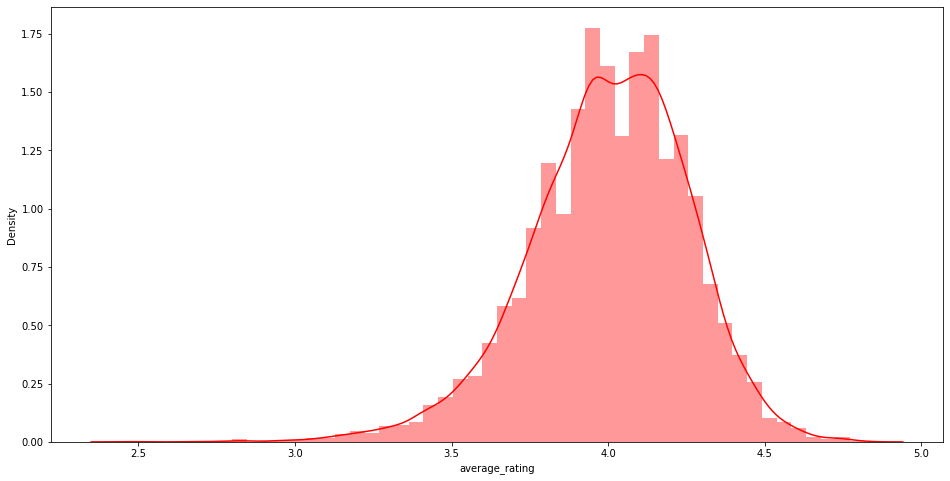

In [13]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.distplot(a=books['average_rating'], kde=True, color='r')

In [ ]:
fig = px.line(books, y="books_count", x="average_rating", title='Book Count VS Average Rating')
fig.show()

In [ ]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

Only selecting important columns.

In [14]:
books_metadata_selected = books[['book_id', 'average_rating', 
'original_publication_year', 'ratings_count', 'language_code']]
books_metadata_selected

,book_id,average_rating,original_publication_year,ratings_count,language_code
0,2767052,4.34,2008.0,4780653,eng
1,3,4.44,1997.0,4602479,eng
2,41865,3.57,2005.0,3866839,en-US
3,2657,4.25,1960.0,3198671,eng
4,4671,3.89,1925.0,2683664,eng
...,...,...,...,...,...
9995,7130616,4.09,2010.0,17204,eng
9996,208324,4.25,1990.0,12582,eng
9997,77431,4.35,1977.0,9421,eng
9998,8565083,3.65,2011.0,11279,eng


## Pandas Profiler
 
 Pandas Profiler gives us a summary of the dataset without writing any code. It behaves like the .describe() function.
 Shown below is a sample report. Let us try and generate a sample report for our dataset.
 
![Pandas](https://miro.medium.com/max/1834/1*98WxRgNtUo026F65XTFz1A.png) 

Running it through pandas profiler to understand the data and gather exploratory details. Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [ ]:
import pandas_profiling

books_metadata_selected.replace('', np.nan, inplace=True)
profile = pandas_profiling.ProfileReport(books_metadata_selected[['average_rating', 'original_publication_year', 'ratings_count']])
profile

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4258: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,3
Number of observations,10000
Total Missing (%),0.1%
Total size in memory,234.5 KiB
Average record size in memory,24.0 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


From the above report it is clear that original_publication_year has missing values which need to be removed.

In [15]:
#rounding the average rating to nearest 0.5 score
books_metadata_selected['average_rating'] = books_metadata_selected['average_rating'].apply(lambda x: round(x*2)/2)

#replacing missing values to the year 
books_metadata_selected['original_publication_year'].replace(np.nan, 2100, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
# using pandas qcut method to convert fields into quantile-based discrete intervals
books_metadata_selected['ratings_count'] = pd.qcut(books_metadata_selected['ratings_count'], 25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
 !pip install pandas==0.25

In [ ]:
profile = pandas_profiling.ProfileReport(books_metadata_selected[['average_rating',
                                                                  'original_publication_year', 'ratings_count']])
profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,3
Number of observations,10000
Total Missing (%),0.0%
Total size in memory,167.2 KiB
Average record size in memory,17.1 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [17]:
#importing ratings data for creating utility matrix
interactions=pd.read_csv("ratings.csv")

In [18]:
interactions

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [19]:
from scipy.sparse import *
from scipy import *
item_dict ={}
df = books[['book_id', 'original_title']].sort_values('book_id').reset_index()
for i in range(df.shape[0]):
    item_dict[(df.loc[i,'book_id'])] = df.loc[i,'original_title']
# dummify categorical features
books_metadata_selected_transformed = pd.get_dummies(books_metadata_selected, columns = ['average_rating','original_publication_year', 'ratings_count', 'language_code'])
books_metadata_selected_transformed = books_metadata_selected_transformed.sort_values('book_id').reset_index().drop('index', axis=1)
books_metadata_selected_transformed.head(5)
# convert to csr matrix
books_metadata_csr = csr_matrix(books_metadata_selected_transformed.drop('book_id', axis=1).values)

In [20]:
books_metadata_selected_transformed

,book_id,average_rating_2.5,average_rating_3.0,average_rating_3.5,average_rating_4.0,average_rating_4.5,average_rating_5.0,original_publication_year_-1750.0,original_publication_year_-762.0,original_publication_year_-750.0,original_publication_year_-720.0,original_publication_year_-560.0,original_publication_year_-500.0,original_publication_year_-476.0,original_publication_year_-458.0,original_publication_year_-441.0,original_publication_year_-440.0,original_publication_year_-431.0,original_publication_year_-430.0,original_publication_year_-411.0,original_publication_year_-401.0,original_publication_year_-400.0,original_publication_year_-390.0,original_publication_year_-385.0,original_publication_year_-380.0,original_publication_year_-350.0,original_publication_year_-335.0,original_publication_year_-330.0,original_publication_year_-300.0,original_publication_year_-17.0,original_publication_year_8.0,original_publication_year_119.0,original_publication_year_180.0,original_publication_year_397.0,original_publication_year_609.0,original_publication_year_800.0,original_publication_year_975.0,original_publication_year_1120.0,original_publication_year_1273.0,original_publication_year_1308.0,...,"ratings_count_(17443.2, 18773.0]","ratings_count_(18773.0, 20276.56]","ratings_count_(20276.56, 22028.4]","ratings_count_(22028.4, 24027.88]","ratings_count_(24027.88, 26234.0]","ratings_count_(26234.0, 29034.04]","ratings_count_(29034.04, 32516.96]","ratings_count_(32516.96, 37095.6]","ratings_count_(37095.6, 42536.72]","ratings_count_(42536.72, 50089.6]","ratings_count_(50089.6, 61463.24]","ratings_count_(61463.24, 79747.92]","ratings_count_(79747.92, 113809.0]","ratings_count_(113809.0, 206820.64]","ratings_count_(206820.64, 4780653.0]",language_code_ara,language_code_dan,language_code_en,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,language_code_fil,language_code_fre,language_code_ger,language_code_ind,language_code_ita,language_code_jpn,language_code_mul,language_code_nl,language_code_nor,language_code_per,language_code_pol,language_code_por,language_code_rum,language_code_rus,language_code_spa,language_code_swe,language_code_tur,language_code_vie
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31538647,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,31845516,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,32075671,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,32848471,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,

In [21]:
books_metadata_csr

<10000x350 sparse matrix of type '<class 'numpy.uint8'>'
	with 38916 stored elements in Compressed Sparse Row format>

In [22]:
item_dict

{1: 'Harry Potter and the Half-Blood Prince',
 2: 'Harry Potter and the Order of the Phoenix',
 3: "Harry Potter and the Philosopher's Stone",
 5: 'Harry Potter and the Prisoner of Azkaban',
 6: 'Harry Potter and the Goblet of Fire',
 8: nan,
 10: 'Harry Potter Collection (Harry Potter, #1-6)',
 11: "The Hitchhiker's Guide to the Galaxy",
 13: "The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story",
 21: 'A Short History of Nearly Everything',
 24: 'Down Under',
 25: 'Notes from a Big Country',
 26: 'The Lost Continent: Travels in Small-Town America',
 27: 'Neither Here Nor There: Travels in Europe',
 28: 'Notes from a Small Island',
 29: 'The Mother Tongue: English and How It Got That Way',
 30: 'The Hobbit and The Lord of the Rings',
 33: 'The Lord of the Rings',
 34: ' The Fellowship of the Ring',
 36: 'The Lord of the Rings: Weapons and Warfare',
 50: 'Hatchet',
 67: 'The Known World',
 93: 'Heidi',
 98: 'What to Expect the First Year',
 105: 'Chapterhouse: Dune',
 10

Therefore , we now have a csr(compressed sparse row)matrix for selected columns from the ratings file. CSR matrices are basically one hot encodings for a dataframe.

In [23]:
user_book_interaction = pd.pivot_table(interactions, index='user_id', columns='book_id', values='rating')
# fill missing values with 0
user_book_interaction = user_book_interaction.fillna(0)
user_id = list(user_book_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1
# convert to csr matrix
user_book_interaction_csr = csr_matrix(user_book_interaction.values)
user_book_interaction_csr

<53424x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 979478 stored elements in Compressed Sparse Row format>

In [25]:
user_book_interaction

book_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating LSTM model 

In [24]:
model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)
model = model.fit(user_book_interaction_csr,
                  epochs=5,
                  num_threads=16, verbose=True)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4


Number of epochs can affect the running time and also precision.

Recommendations function that maps the user IDs to their titles and generates recommendations using the LSTM model.

In [141]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 5, show = True):
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items), item_features=books_metadata_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x in item_dict]
    return_score_list = scores[0:nrec_items]

    print(known_items)
    print(return_score_list)

    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
          if i in item_dict:
            print(str(counter) + '- ' + item_dict[i])
            counter+=1
          else:
            print(str(counter) + '- ' + 'not found in item_dict')
            counter+=1
            
    print("\n Recommended Items:")
    counter = 1
    for i in return_score_list:
      if i in item_dict:
        print(i)
        print(str(counter) + '- ' + item_dict[i])
        counter+=1
      else:
        print(str(counter) + '- ' + 'not found in item_dict')
        counter+=1


In [142]:
sample_recommendation_user(model, user_book_interaction, 5, user_dict, item_dict)

[8072, 7487, 6703, 6646, 4829]
[21, 5158, 4530, 4645, 5]
User: 5
Known Likes:
1- not found in item_dict
2- not found in item_dict
3- not found in item_dict
4- not found in item_dict
5- not found in item_dict

 Recommended Items:
21
1- A Short History of Nearly Everything
5158
2- A Virtuous Woman 
4530
3- Olivia Joules And The Overactive Imagination
4645
4- The Snows of Kilimanjaro and Other Stories
5
5- Harry Potter and the Prisoner of Azkaban


In [124]:
item_dict[21]

'A Short History of Nearly Everything'

In [50]:
item_dict[475]

'Collapse: How Societies Chose to Fail or Succeed'

In [51]:
item_dict[8072]

KeyError: ignored

In [135]:
sample_recommendation_user(model, user_book_interaction, 500, user_dict, item_dict)

[9589, 9201, 8515, 8103, 7893, 7886, 7029, 3075]
[8909, 8952, 8648, 8852, 7733]
User: 500
Known Likes:
1- Hocus Pocus
2- not found in item_dict
3- The Man Who Listens to Horses
4- not found in item_dict
5- not found in item_dict
6- not found in item_dict
7- not found in item_dict
8- not found in item_dict

 Recommended Items:
8909
1- The War of the Worlds
8952
2- Killers of the Dawn (Cirque Du Freak, #9)
8648
3- Xenocide
8852
4- The Tragedy of Macbeth
7733
5- Gulliver’s Travels


In [136]:
sample_recommendation_user(model, user_book_interaction, 7, user_dict, item_dict)

[9103, 8654, 8432, 8413, 8320, 7904, 7814, 7807, 7490, 7377, 7325, 7217, 7128, 7003, 6701, 6445, 6444, 6152, 5388, 5341, 5332, 5047, 4964, 4944, 4885, 4726, 4608, 4588, 4574, 4459, 4190, 4138, 4101, 3884, 3797, 3711, 3672, 3314, 3247, 3246, 3137, 3111, 2969, 2931, 2782, 2766, 2693, 2564, 2491, 2487, 2470, 2325, 2241, 2189, 2129, 2102, 2084, 2045, 1991, 1969, 1923, 1918, 1873, 1801, 1646, 1620, 1536, 1519, 1484, 1464, 1199, 1071, 956, 910, 585]
[4008, 7973, 8600, 8647, 6427]
User: 7
Known Likes:
1- not found in item_dict
2- not found in item_dict
3- not found in item_dict
4- not found in item_dict
5- not found in item_dict
6- not found in item_dict
7- not found in item_dict
8- not found in item_dict
9- not found in item_dict
10- not found in item_dict
11- not found in item_dict
12- not found in item_dict
13- not found in item_dict
14- not found in item_dict
15- not found in item_dict
16- not found in item_dict
17- not found in item_dict
18- not found in item_dict
19- not found in item_d

In [137]:
sample_recommendation_user(model, user_book_interaction, 20, user_dict, item_dict)

[9827, 9168, 8689]
[8648, 8909, 8952, 1307, 8696]
User: 20
Known Likes:
1- King Rat
2- not found in item_dict
3- not found in item_dict

 Recommended Items:
8648
1- Xenocide
8909
2- The War of the Worlds
8952
3- Killers of the Dawn (Cirque Du Freak, #9)
1307
4- Fire Sea
8696
5- Last Chance to See


In [138]:
sample_recommendation_user(model, user_book_interaction, 101, user_dict, item_dict)

[9516, 8613, 8412, 8045, 6569, 6084, 5787]
[5548, 386, 5158, 4645, 7714]
User: 101
Known Likes:
1- Persepolis
2- not found in item_dict
3- not found in item_dict
4- not found in item_dict
5- not found in item_dict
6- not found in item_dict
7- El Aleph

 Recommended Items:
5548
1- What Do You Care What Other People Think? Further Adventures of a Curious Character
386
2- Another Bullshit Night in Suck City: A Memoir
5158
3- A Virtuous Woman 
4645
4- The Snows of Kilimanjaro and Other Stories
7714
5- Pygmalion


Thence, the models works pretty well. It generates recommendations according to the score.

This model was a good change from the traditional collaborative and content based filtering and may give precise results if trained and deployed.

# Conclusion


Although there are tons of implementations of recommendation systems on the Internet, all are very confusing. Therefore this notebook is just a simple guide or representation to learn about them. Content based, Collaborative and Hybrid recommendation systems are successfully implemented. Content based recommendations are easy to implement but lack precision. On the other hand, collaborative filtering is a tad bit difficult to implement but gives better results. The LightFM model is a good option too, but i think it is just a complicated implementation of collaborative filtering.

## References:

1. Mining of Massive Datasets,Book by Anand Rajaraman and Jeffrey Ullman.
2. [ Google's mini-course](https://developers.google.com/machine-learning/recommendation)
3. [A very helpful post](https://towardsdatascience.com/recommendation-system-in-python-lightfm-61c85010ce17)
4. [LightFM Documentation](https://making.lyst.com/lightfm/docs/home.html)